# PCA through Singular Value Decomposition

In [31]:
import numpy as np

# Defined 3 points in 2D-space:
X = np.array([[2, 1, 0], [4, 3, 0]])

# Calculate the mean of each dimension
mean_X = np.mean(X, axis=1).reshape(-1, 1)

# Subtract the mean to center the data
X_centered = X - mean_X

# Calculate the covariance matrix of centered data
C = np.cov(X_centered)

# Calculate the SVD decomposition of the covariance matrix
U, D, V = np.linalg.svd(C)

# Extract the new basis vectors
u1 = U[:, 0]  # First new basis vector
u2 = U[:, 1]  # Second new basis vector

# Calculate the coordinates in the new orthonormal basis
# For this, we project the centered data onto the new basis vectors
X_new_basis = U.T @ X_centered

# Calculate the approximation of the original data from the new basis
# Note: Since X was centered, we need to add back the mean to the approximation
X_approx = U @ X_new_basis + mean_X

# Print the coordinates in the new basis to check
print("Coordinates in new basis:\n", X_new_basis)

# Check the approximation of the original
print("Approximated data:\n", X_approx)

# Check if we got the original by comparing X_approx with X
print("Original data:\n", X)



Coordinates in new basis:
 [[-1.9334711  -0.60372628  2.53719738]
 [-0.19866376  0.28277026 -0.0841065 ]]
Approximated data:
 [[2.00000000e+00 1.00000000e+00 5.55111512e-16]
 [4.00000000e+00 3.00000000e+00 0.00000000e+00]]
Original data:
 [[2 1 0]
 [4 3 0]]


# PCA on Iris data

In [32]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

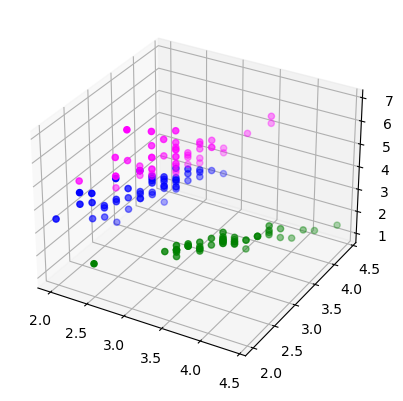

In [33]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


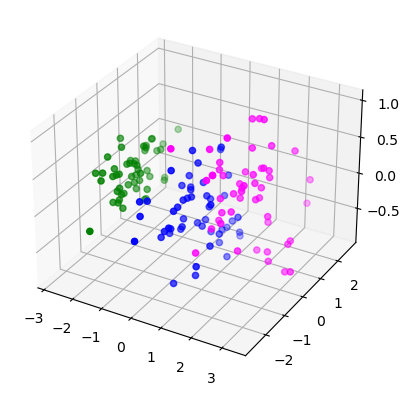

In [34]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA from sklearn.decomposition
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

# Define PCA object (three components), fit and transform the data
pca = PCA(n_components=3)  # Use the imported PCA
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2 = plt.axes(projection='3d')
axes2.scatter3D(Xpca[y == 0, 0], Xpca[y == 0, 1], Xpca[y == 0, 2], color='green')
axes2.scatter3D(Xpca[y == 1, 0], Xpca[y == 1, 1], Xpca[y == 1, 2], color='blue')
axes2.scatter3D(Xpca[y == 2, 0], Xpca[y == 2, 1], Xpca[y == 2, 2], color='magenta')
plt.show()



In [35]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [36]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

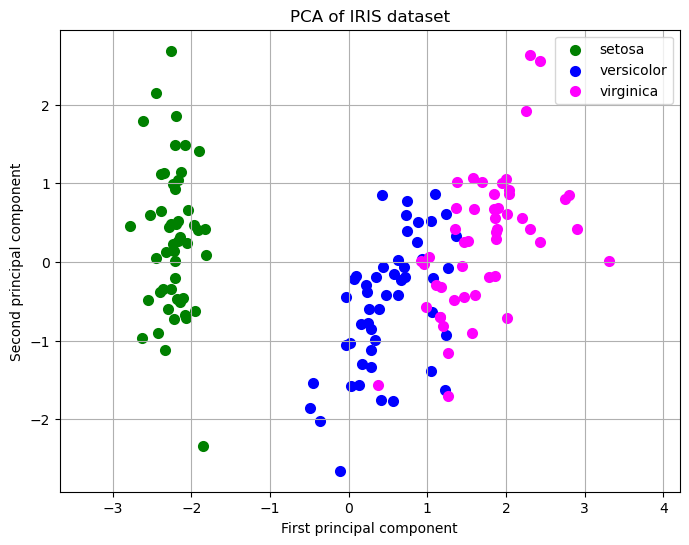

In [37]:
# Plot the principal components in 2D, mark different targets in color

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Pre-processing with StandardScaler
Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

# Define PCA object (two components), fit and transform the data
# Since we're plotting in 2D, we use n_components=2
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xpp)

# Now plot the first two principal components in 2D
plt.figure(figsize=(8, 6))
colors = ['green', 'blue', 'magenta']

# Plot each class
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(Xpca[y == i, 0], Xpca[y == i, 1], color=color, lw=2, label=target_name)

plt.title('PCA of IRIS dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis('equal')
plt.grid(True)
plt.show()


# KNN classifier

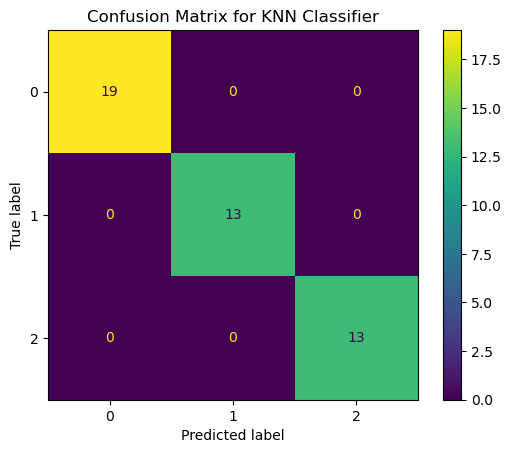

In [38]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but recommended for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier with 3 neighbors
knn1 = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn1.fit(X_train, y_train)

# Predict the labels on the test data
Ypred = knn1.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, Ypred)

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)
plt.title('Confusion Matrix for KNN Classifier')
plt.show()



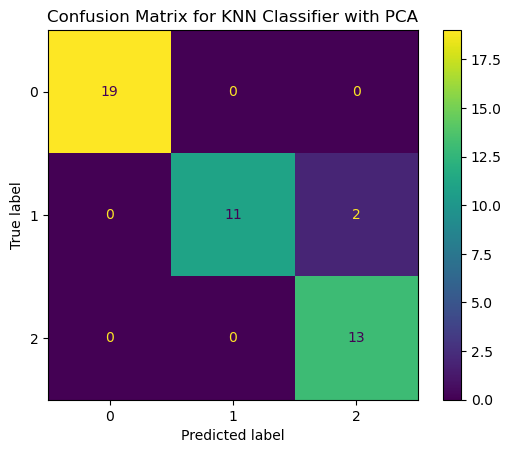

Classification report for classifier using the full dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Classification report for classifier using the PCA-reduced dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [39]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).

from sklearn.model_selection import train_test_split

# Pre-processing with StandardScaler
Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

# Apply PCA and reduce to two components
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xpp)

# Split the PCA-transformed data into a training set and a test set
X_train_pca, X_test_pca, y_train, y_test = train_test_split(Xpca, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier with 3 neighbors
knn_pca = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn_pca.fit(X_train_pca, y_train)

# Predict the labels on the test data
Ypred_pca = knn_pca.predict(X_test_pca)

# Generate the confusion matrix
cm_pca = confusion_matrix(y_test, Ypred_pca)

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, Ypred_pca)
plt.title('Confusion Matrix for KNN Classifier with PCA')
plt.show()

#############################################################################################################################################################################

# Compare the results with full dataset

from sklearn.metrics import classification_report

# Metrics for the classifier using the full dataset
print("Classification report for classifier using the full dataset:")
print(classification_report(y_test, Ypred))

# Metrics for the classifier using the PCA-reduced dataset
print("Classification report for classifier using the PCA-reduced dataset:")
print(classification_report(y_test, Ypred_pca))


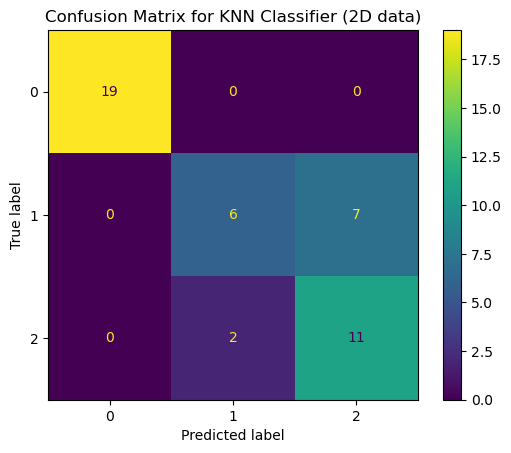

Classification report for KNN classifier using only 2-dimensional data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.75      0.46      0.57        13
           2       0.61      0.85      0.71        13

    accuracy                           0.80        45
   macro avg       0.79      0.77      0.76        45
weighted avg       0.82      0.80      0.79        45



In [40]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)

# Using only the first two features (columns) of the original dataset
X_2d = X[:, :2]

# Split the 2-dimensional data into a training set and a test set
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# Standardize the 2-dimensional features
scaler_2d = StandardScaler()
X_train_2d = scaler_2d.fit_transform(X_train_2d)
X_test_2d = scaler_2d.transform(X_test_2d)

# Initialize the KNN classifier with 3 neighbors
knn_2d = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the 2-dimensional training data
knn_2d.fit(X_train_2d, y_train)

# Predict the labels on the 2-dimensional test data
Ypred_2d = knn_2d.predict(X_test_2d)

# Generate the confusion matrix
cm_2d = confusion_matrix(y_test, Ypred_2d)

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, Ypred_2d)
plt.title('Confusion Matrix for KNN Classifier (2D data)')
plt.show()

# Generate the classification report
print("Classification report for KNN classifier using only 2-dimensional data:")
print(classification_report(y_test, Ypred_2d))

To conclude, when using all four features of the Iris dataset, the KNN classifier achieved perfect classification, with an accuracy of 100%. This suggests that all four features provide essential information that allows the KNN algorithm to perfectly distinguish between the three classes of the Iris dataset. ✅

With the PCA-reduced dataset (first two principal components), there was a slight decrease in performance, with an accuracy of 96%. The PCA transformation reduced the dimensionality of the data while retaining most of the variance, leading to a small number of misclassifications.

Finally, when using only the first two features (sepal length and sepal width) without PCA, the accuracy dropped to 80% 📉. The precision and recall for class 1 and class 2 indicate a noticeable amount of misclassification compared to the other two methods.

In conclusion, PCA can be beneficial for simplifying the dataset and potentially speeding up the training process with a minimal loss in accuracy. However, arbitrarily discarding features without considering their importance can lead to a significant decrease in model performance.